In [1]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
with open('canine_flu_test.fa') as fasta_file: 
    ct_titles = []
    ct_sequences = []
    for title, sequence in SimpleFastaParser(fasta_file):
        ct_titles.append(title)
        ct_sequences.append(sequence)
caninet = pd.DataFrame(list(zip(ct_titles, ct_sequences)), columns=['titles','sequences'])

In [3]:
caninet.head()

,titles,sequences
0,MH363660 A/canine/Georgia/20170606-19/2017 201...,AGCAAAAGCAGGGGATACTTTCATTAATCATGAAAACTGTTATTGC...
1,MH363665 A/canine/Georgia/20170606-19/2017 201...,AGCAAAAGCAGGGTGACAAAAACATAATGGACTCCAACACTGTGTC...
2,MH363670 A/canine/Georgia/20170606-19/2017 201...,AGCAAAAGCAGGAGTAAAAATGAACCCAAATCAAAAGATAATAGCA...
3,MH363671 A/canine/Georgia/20170606-19/2017 201...,AGCAAAAGCAGGTCAAATATATTCAATATGGAAAGAATAAAAGAAT...
4,MH363685 A/canine/Georgia/20170606-19/2017 201...,AGCAAAAGCAGGGTAGATAATCACTCACTGAGTGACATCAACGTCA...


In [4]:
caninet.tail()

,titles,sequences
1235,MH266395 A/canine/South Carolina/132956/2017 2...,AGCAAAAGCAGGGTAGATAATCACTCACTGAGTGACATCAACGTCA...
1236,MH266396 A/canine/South Carolina/132956/2017 2...,AGCAAAAGCAGGGTGACAAAAACATAATGGACTCCAACACTGTGTC...
1237,MH266397 A/canine/South Carolina/132956/2017 2...,AGCAAAAGCAGGTACTGATCCAAAATGGAAGACTTTGTGAGACAAT...
1238,MH266398 A/canine/South Carolina/132956/2017 2...,AGCGAAAGCAGGCAAACCATTTGAATGGATGTCAATCCGACTTTAC...
1239,MH266399 A/canine/South Carolina/132956/2017 2...,AGCGAAAGCAGGTCAAATATATTCAATATGGAAAGAATAAAAGAAT...


In [5]:
# character kgram function, out is set
def charkgram(text, k):
    results=set()
    for i in range(len(text)-k+1):
        if text[i:i+k] not in results:
            results.add(text[i:i+k])
    return(results)

In [6]:
def JacSim(a,b):
    top = len(a & b)
    bottom = len(a | b)
    return(top/bottom)

In [7]:
ct_sequences[0]

'AGCAAAAGCAGGGGATACTTTCATTAATCATGAAAACTGTTATTGCTTTAAGCTATATTTTCTGCCTGGCTTTTGGTCAGAATCTTCTAGGAAATGAAAATAATGCTGCAACACTATGCCTGGGACATCATGCAGTGCCGAACGGGACAATGGTAAAAACTATCACAGACGATCAAATTGAGGTGACCAACGCCACTGAGCTAGTCCAAAACTCCTCAACAGGGAAAATATGCAACAATCCCCACAAGATTCTTGATGGGAGGGACTGCACGCTAATAGATGCCCTACTAGGGGACCCACACTGTGACGTCTTCCAAAATGAGACATGGGACCTTTTTGTGGAACGAAGCAATGCTTTTAGCAATTGTTACCCTTATGATGTACCAGACTATGCATCCCTCCGATCCATAGTTGCATCATCAGGCACATTGGAGTTCATCACTGAAGGTTTCACTTGGGCAGGAGTAACTCAAAATGGAGGAAGCGGTGCTTGTAAAAGGGGACCTGCTAATAGTTTCTTCAGTAGATTGAATTGGTTAACTAAATCAGGAAATACATATCCAGTGTTGAATGTGACTATGCCAAACAACAACAATTTCGACAAATTATACATCTGGGGAGTTCATCACCCAAGCACTGATCAAGAACAAACCAGCCTGTATATTCAGGCCTCAGGAAGAGTCACAGTCTCTACCAGGAGAAGCCAACAGACCATAATCCCAAACATTGGATCTAGACCCTTGGTAAGGGGCCAATCTGGCAGAATAAGCGTATATTGGACAATAGTCAAACCTGGAGACATACTGGTAATAAACAGTAATGGAAACCTAATCGCTCCTCGAGGATACTTCAAAATGCACATTGGGAAAAGCTCAATAATGAGATCAGATGCACCTATTGACACCTGCATTTCCGAATGTATCACCCCGAACGGGAGCATCCCCAATGAAAAGCCCTTCCAAAATGTAAACAAGATCACATACGGAGCATGTCCCAAAT

In [8]:
ct_sequences[1]

'AGCAAAAGCAGGGTGACAAAAACATAATGGACTCCAACACTGTGTCAAGCTTTCAGGTAGACTGCTTTCTTTGGCATGTCCGCAAACGATTTGCAGACCAAGAACTGGGTGATGCCCCATTCCTTGATCGGCTTCGCCGAGATCAGAAGTCCCTAAGAGGAAGAGGCAGCACCCTTGGTCTGGACATTGAAACAGCTACTCGTATAGGAAAACAGATAGTGGAGTGGATTCTGGAGGAAGAATCCGATAAGGCACTTAAAATGACCATTGCTTCAGTCCCAGTTTCATGCTACCTAACTGATATGACACTTGAAGAAATGTCAAGAGACTGGTTCATGCTCATGCCAAAGCAAAAAGTAGCAGGGTCCCTTTGCATCAAAATGGACCAGGCAATAATGGATAAAAACATCACATTGAAAGCAAACTTCAGTGTGATTTTTGAGCGACTGGAAACTCTAATACTACTTAGAGCTTTCACAAACGAAGGAGCAATTGTGGGAGAAATTTCACCATTACCTTCTCTTCCAGGACATACTGATAAGGATGTCAAAAATGCAATTGGGATCCTCATCGGAGGGCTTGAATGGAATGATAACACAGTTCGAGTCTCTGAAATTCTACAGAGATTCGCTTGGAGAAGCAGTGATGAGAATGGGAGATCTTCACTCCCTCCAAAGTAGAAACGGAAAATGGCGAGAACAATTAAGTCAGAAATTTGAGGAAATAAGGTGGCTAATCGAAGAAGTACGGCATAGATTAAAGATTACGGAAAACAGCTTTGAACAAATAACATTTATGCAAGCCTTACAACTATTGCTTGAGGTAGAGCAAGAGATAAGAACTTTCTCGTTTCAGCTTATTTAATGATAAAAAACACCCTTGTTTCTACT'

comparing two different genes from the same genome.

In [9]:
seq0_kg = charkgram(ct_sequences[0],3)
seq1_kg = charkgram(ct_sequences[1],3)
JacSim(seq0_kg,seq1_kg)

1.0

In [10]:
seq0_kg = charkgram(ct_sequences[0],4)
seq1_kg = charkgram(ct_sequences[1],4)
JacSim(seq0_kg,seq1_kg)

0.888

In [11]:
seq0_kg = charkgram(ct_sequences[0],5)
seq1_kg = charkgram(ct_sequences[1],5)
JacSim(seq0_kg,seq1_kg)

0.5344619105199516

In [12]:
seq0_kg = charkgram(ct_sequences[0],6)
seq1_kg = charkgram(ct_sequences[1],6)
JacSim(seq0_kg,seq1_kg)

0.20433255269320844

In [13]:
seq0_kg = charkgram(ct_sequences[0],7)
seq1_kg = charkgram(ct_sequences[1],7)
JacSim(seq0_kg,seq1_kg)

0.0663153271848924

comparing 2 HA genes from different strains

In [14]:
ct_titles[0:24]

['MH363660 A/canine/Georgia/20170606-19/2017 2017/05/25 4 (HA)',
 'MH363665 A/canine/Georgia/20170606-19/2017 2017/05/25 8 (NS)',
 'MH363670 A/canine/Georgia/20170606-19/2017 2017/05/25 6 (NA)',
 'MH363671 A/canine/Georgia/20170606-19/2017 2017/05/25 1 (PB2)',
 'MH363685 A/canine/Georgia/20170606-19/2017 2017/05/25 5 (NP)',
 'MH363689 A/canine/Georgia/20170606-19/2017 2017/05/25 3 (PA)',
 'MH363690 A/canine/Georgia/20170606-19/2017 2017/05/25 7 (MP)',
 'MH363696 A/canine/Georgia/20170606-19/2017 2017/05/25 2 (PB1)',
 'MH363666 A/canine/Georgia/89750.1/2017 2017/05/26 8 (NS)',
 'MH363669 A/canine/Georgia/89750.1/2017 2017/05/26 4 (HA)',
 'MH363676 A/canine/Georgia/89750.1/2017 2017/05/26 6 (NA)',
 'MH363678 A/canine/Georgia/89750.1/2017 2017/05/26 1 (PB2)',
 'MH363683 A/canine/Georgia/89750.1/2017 2017/05/26 7 (MP)',
 'MH363686 A/canine/Georgia/89750.1/2017 2017/05/26 5 (NP)',
 'MH363691 A/canine/Georgia/89750.1/2017 2017/05/26 3 (PA)',
 'MH363699 A/canine/Georgia/89750.1/2017 2017/05/2

In [15]:
seq0_kg = charkgram(ct_sequences[0],5)
seq22_kg = charkgram(ct_sequences[22],5)
JacSim(seq0_kg,seq22_kg)

0.9186351706036745

In [16]:
# character kgram function out is a list
def charkgramL(text, k):
    results=[]
    for i in range(len(text)-k+1):
        if text[i:i+k] not in results:
            results.append(text[i:i+k])
    return(results)

In [17]:
seq0_kg = charkgramL(ct_sequences[0],5)
seq22_kg = charkgramL(ct_sequences[22],5)
JacSim(set(seq0_kg),set(seq22_kg))

0.9186351706036745

In [18]:
from datasketch import MinHash

In [19]:
data1 = seq0_kg
data2 = seq22_kg
m1, m2 = MinHash(num_perm=128), MinHash(num_perm=128)
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
estimate=m1.jaccard(m2)
print("Estimated Jaccard for data1 and data2 is", estimate)

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)
print("error = ", estimate-actual_jaccard)

Estimated Jaccard for data1 and data2 is 0.9296875
Actual Jaccard for data1 and data2 is 0.9186351706036745
error =  0.0110523293963255


not very similar

In [20]:
seq0_kg = charkgramL(ct_sequences[0],5)
seq1_kg = charkgramL(ct_sequences[1],5)
JacSim(set(seq0_kg),set(seq1_kg))

0.5344619105199516

In [21]:
data1 = seq0_kg
data2 = seq1_kg
m1, m2 = MinHash(num_perm=128), MinHash(num_perm=128)
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
estimate=m1.jaccard(m2)
print("Estimated Jaccard for data1 and data2 is", estimate)

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)
print("error = ", estimate-actual_jaccard)

Estimated Jaccard for data1 and data2 is 0.53125
Actual Jaccard for data1 and data2 is 0.5344619105199516
error =  -0.003211910519951622


probably identical

In [22]:
seq0_kg = charkgramL(ct_sequences[0],5)
seq9_kg = charkgramL(ct_sequences[9],5)
JacSim(set(seq0_kg),set(seq9_kg))

1.0

In [23]:
data1 = seq0_kg
data2 = seq9_kg
m1, m2 = MinHash(num_perm=128), MinHash(num_perm=128)
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
estimate=m1.jaccard(m2)
print("Estimated Jaccard for data1 and data2 is", estimate)

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)
print("error = ", estimate-actual_jaccard)

Estimated Jaccard for data1 and data2 is 1.0
Actual Jaccard for data1 and data2 is 1.0
error =  0.0


In [24]:
seq0_kg = charkgramL(ct_sequences[0],13)
seq9_kg = charkgramL(ct_sequences[9],13)
JacSim(set(seq0_kg),set(seq9_kg))

1.0

In [25]:
data1 = seq0_kg
data2 = seq9_kg
m1, m2 = MinHash(num_perm=128), MinHash(num_perm=128)
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
estimate=m1.jaccard(m2)
print("Estimated Jaccard for data1 and data2 is", estimate)

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)
print("error = ", estimate-actual_jaccard)

Estimated Jaccard for data1 and data2 is 1.0
Actual Jaccard for data1 and data2 is 1.0
error =  0.0


In [26]:
HA_only = caninet.loc[caninet.iloc[:,0].str.contains(r'(HA)')]

/home/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [27]:
HA_only.shape

(155, 2)

In [28]:
import itertools as it

In [29]:
HA_seqs = list(HA_only.sequences)
rcl=list(it.combinations(HA_seqs,2))

In [30]:
rcl[12]

('AGCAAAAGCAGGGGATACTTTCATTAATCATGAAAACTGTTATTGCTTTAAGCTATATTTTCTGCCTGGCTTTTGGTCAGAATCTTCTAGGAAATGAAAATAATGCTGCAACACTATGCCTGGGACATCATGCAGTGCCGAACGGGACAATGGTAAAAACTATCACAGACGATCAAATTGAGGTGACCAACGCCACTGAGCTAGTCCAAAACTCCTCAACAGGGAAAATATGCAACAATCCCCACAAGATTCTTGATGGGAGGGACTGCACGCTAATAGATGCCCTACTAGGGGACCCACACTGTGACGTCTTCCAAAATGAGACATGGGACCTTTTTGTGGAACGAAGCAATGCTTTTAGCAATTGTTACCCTTATGATGTACCAGACTATGCATCCCTCCGATCCATAGTTGCATCATCAGGCACATTGGAGTTCATCACTGAAGGTTTCACTTGGGCAGGAGTAACTCAAAATGGAGGAAGCGGTGCTTGTAAAAGGGGACCTGCTAATAGTTTCTTCAGTAGATTGAATTGGTTAACTAAATCAGGAAATACATATCCAGTGTTGAATGTGACTATGCCAAACAACAACAATTTCGACAAATTATACATCTGGGGAGTTCATCACCCAAGCACTGATCAAGAACAAACCAGCCTGTATATTCAGGCCTCAGGAAGAGTCACAGTCTCTACCAGGAGAAGCCAACAGACCATAATCCCAAACATTGGATCTAGACCCTTGGTAAGGGGCCAATCTGGCAGAATAAGCGTATATTGGACAATAGTCAAACCTGGAGACATACTGGTAATAAACAGTAATGGAAACCTAATCGCTCCTCGAGGATACTTCAAAATGCACATTGGGAAAAGCTCAATAATGAGATCAGATGCACCTATTGACACCTGCATTTCCGAATGTATCACCCCGAACGGGAGCATCCCCAATGAAAAGCCCTTCCAAAATGTAAACAAGATCACATACGGAGCATGTCCCAAA

In [31]:
idl=list(it.combinations(list(HA_only.index),2))

In [32]:
a=idl[12][0]
b=idl[12][1]
HA_seqs[idl[12][0]],HA_seqs[idl[12][1]]

('AGCAAAAGCAGGGGATACTTTCATTAATCATGAAAACTGTTATTGCTTTAAGCTATATTTTCTGCCTGGCTTTTGGTCAGAATCTTCTAGGAAATGAAAATAATGCTGCAACACTATGCCTGGGACATCATGCAGTGCCGAACGGGACAATGGTAAAAACTATCACAGACGATCAAATTGAGGTGACCAACGCCACTGAGCTAGTCCAAAACTCCTCAACAGGGAAAATATGCAACAATCCCCACAAGATTCTTGATGGGAGGGACTGCACGCTAATAGATGCCCTACTAGGGGACCCACACTGTGACGTCTTCCAAAATGAGACATGGGACCTTTTTGTGGAACGAAGCAATGCTTTTAGCAATTGTTACCCTTATGATGTACCAGACTATGCATCCCTCCGATCCATAGTTGCATCATCAGGCACATTGGAGTTCATCACTGAAGGTTTCACTTGGGCAGGAGTAACTCAAAATGGAGGAAGCGGTGCTTGTAAAAGGGGACCTGCTAATAGTTTCTTCAGTAGATTGAATTGGTTAACTAAATCAGGAAATACATATCCAGTGTTGAATGTGACTATGCCAAACAACAACAATTTCGACAAATTATACATCTGGGGAGTTCATCACCCAAGCACTGATCAAGAACAAACCAGCCTGTATATTCAGGCCTCAGGAAGAGTCACAGTCTCTACCAGGAGAAGCCAACAGACCATAATCCCAAACATTGGATCTAGACCCTTGGTAAGGGGCCAATCTGGCAGAATAAGCGTATATTGGACAATAGTCAAACCTGGAGACATACTGGTAATAAACAGTAATGGAAACCTAATCGCTCCTCGAGGATACTTCAAAATGCACATTGGGAAAAGCTCAATAATGAGATCAGATGCACCTATTGACACCTGCATTTCCGAATGTATCACCCCGAACGGGAGCATCCCCAATGAAAAGCCCTTCCAAAATGTAAACAAGATCACATACGGAGCATGTCCCAAA

In [51]:
idl[12]

(0, 107)

In [33]:
idl[12][1]

107

In [34]:
len(idl)

11935

In [53]:
len(HA_seqs)

155

In [48]:
JacSim(charkgram(HA_seqs[idl[12][0]],5),charkgram(HA_seqs[idl[12][1]],5))

0.928476821192053

above is actually incorrect since the index values from pandas DF don't transfer to list so get list out of range error...

In [69]:
HA_only.loc[[22]]

,titles,sequences
22,EU127500 A/canine/Korea/GCVP01/2007 2007/05/ 4...,ATGAAGACCGTTATTGCTTTAAGCTACATTTTCTGCCTGGCTTTTG...


In [70]:
idl[1193]

(59, 1152)

In [72]:
i = idl[1193]
HA_only.loc[[i[0]]]

,titles,sequences
59,CY090035 A/canine/Korea/1/2010 2010/02/05 4 (HA),ATGAAAACTGTTATTGCTTTAAGCTACATTTTCTGCCTGGCTTTTG...


In [92]:
HA_only.loc[[i[1]]].sequences.values[0]

'AGCAAAAGCAGGGGATACTTTCATTAATCATGAAAACTGTTATTGCTTTAAGCTATATTTTCTGCCTGGCTTTTGGTCAGAATCTTCTAGGAAATGAAAATAATGCTGCAACACTATGCTTGGGACATCATGCAGTGCCGAACGGGACAATGGTAAAAACTATCACAGACGATCAAATTGAGGTGACCAACGCCACTGAGCTAGTCCAAAACTCCTCAACAGGGAAAATATGCAACAATCCCCACAAGATTCTTGATGGGAGGGACTGCACGCTAATAGATGCCCTACTAGGGGACCCACACTGTGACGTCTTCCAAAATGAGACATGGGACCTTTTTGTGGAACGAAGCAATGCTTTTAGCAATTGTTACCCTTATGATGTACCAGACTATGCATCCCTCCGATCCATAGTTGCATCATCAGGCACATTGGAGTTCATCACTGAAGGTTTCACTTGGGCAGGAGTAACTCAAAATGGAGGAAGCGGTGCTTGTAAAAGGGGACCTGCTAATAGTTTCTTCAGTAGATTGAATTGGTTAACTAAATCAGGAAATACATATCCAGTGTTGAATGTGACTATGCCAAACAACAACAATTTCGACAAATTATACATCTGGGGAGTTCATCACCCAAGCACTGATCAAGAACAAACCAGCCTGTATATTCAGGCCTCAGGAAGAGTCACAGTCTCTACCAGGAGAAGCCAACAGACCATAATCCCAAACATTGGATCTAGACCCTTGGTAAGGGGCCAATCTGGCAGAATAAGCGTATATTGGACAATAGTCAAACCTGGAGACATACTGGTAATAAACAGTAATGGAAACCTAATCGCTCCTCGAGGATACTTCAAAATGCACATTGGGAAAAGCTCAATAATGAGATCAGATGCACCTATTGACACCTGCATTTCCGAATGTATCACCCCGAACGGGAGCATCCCCAATGAAAAGCCCTTCCAAAATGTAAACAAGATCACATACGGAGCATGTCCCAAAT

In [94]:
i = idl[12]
JacSim(charkgram(HA_only.loc[[i[0]]].sequences.values[0],5),charkgram(HA_only.loc[[i[1]]].sequences.values[0],5))

0.918848167539267

In [111]:
JSresults=[]
for i in idl:
    JSresults.append(JacSim(charkgram(HA_only.loc[[i[0]]].sequences.values[0],5),charkgram(HA_only.loc[[i[1]]].sequences.values[0],5)))

In [96]:
JSresults

[1.0,
 0.9186351706036745,
 0.8931788931788932,
 0.90956749672346,
 0.9015544041450777,
 0.8989637305699482,
 0.91688654353562,
 0.9153645833333334,
 0.9186351706036745,
 0.9201570680628273,
 0.9224704336399474,
 0.9212598425196851,
 0.918848167539267,
 0.9340369393139841,
 0.912303664921466,
 0.9235836627140975,
 0.9360852197070573,
 0.9185282522996058,
 0.9389920424403183,
 0.9172141918528253,
 0.9314888010540184,
 0.9186351706036745,
 0.9186351706036745,
 0.7149532710280374,
 0.9278215223097113,
 0.9303547963206308,
 0.9303547963206308,
 0.6848837209302325,
 0.6786961583236322,
 0.6821885913853318,
 0.6856810244470314,
 0.9223684210526316,
 0.9223684210526316,
 0.9223684210526316,
 0.9354413702239789,
 0.9596774193548387,
 0.671280276816609,
 0.9193121693121693,
 0.9730094466936572,
 0.9610738255033557,
 0.9770580296896086,
 0.9783783783783784,
 0.6872093023255814,
 0.9783783783783784,
 0.977027027027027,
 0.9783783783783784,
 0.9757738896366084,
 0.9743935309973046,
 0.971774193548

In [97]:
min(JSresults)

0.6179775280898876

In [99]:
max(JSresults)

1.0

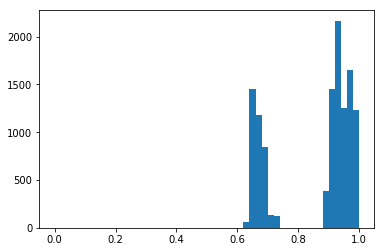

In [145]:
plt.hist(JSresults, 50, range=(0,1));

In [107]:
JSresults6=[]
for i in idl:
    JSresults6.append(JacSim(charkgram(HA_only.loc[[i[0]]].sequences.values[0],6),charkgram(HA_only.loc[[i[1]]].sequences.values[0],6)))

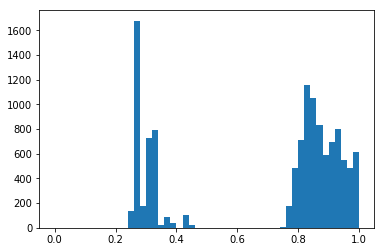

In [144]:
plt.hist(JSresults6, 50, range=(0,1));

In [148]:
min(JSresults6)

0.25012431626056686

In [113]:
JSresults7=[]
for i in idl:
    JSresults7.append(JacSim(charkgram(HA_only.loc[[i[0]]].sequences.values[0],7),charkgram(HA_only.loc[[i[1]]].sequences.values[0],7)))

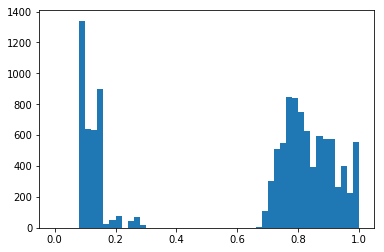

In [141]:
plt.hist(JSresults7, 50, range=(0,1));

In [147]:
min(JSresults7)

0.08283816847256203

In [116]:
JSresults4=[]
for i in idl:
    JSresults4.append(JacSim(charkgram(HA_only.loc[[i[0]]].sequences.values[0],4),charkgram(HA_only.loc[[i[1]]].sequences.values[0],4)))

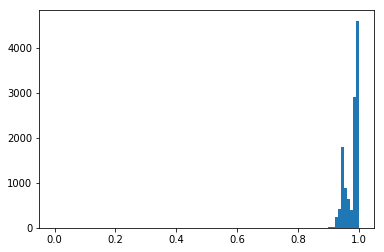

In [143]:
plt.hist(JSresults4, 100, range=(0,1));

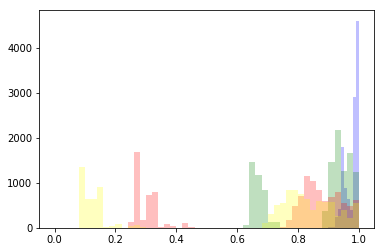

In [146]:
plt.hist(JSresults4, 100, color='blue', alpha=0.25, range=(0,1))
plt.hist(JSresults, 50, color='green', alpha=0.25, range=(0,1))
plt.hist(JSresults6, 50, color='red', alpha=0.25, range=(0,1))
plt.hist(JSresults7, 50, color='yellow', alpha=0.25, range=(0,1));

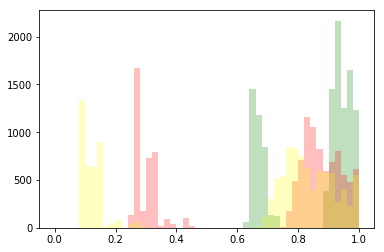

In [149]:
#plt.hist(JSresults4, 100, color='blue', alpha=0.25, range=(0,1))
plt.hist(JSresults, 50, color='green', alpha=0.25, range=(0,1))
plt.hist(JSresults6, 50, color='red', alpha=0.25, range=(0,1))
plt.hist(JSresults7, 50, color='yellow', alpha=0.25, range=(0,1));

In [124]:
import seaborn as sns

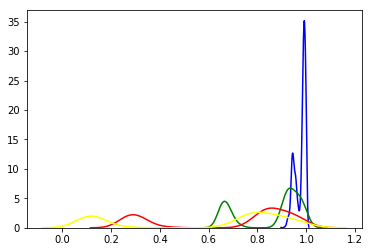

In [132]:
sns.kdeplot(np.array(JSresults4), color='blue')
sns.kdeplot(np.array(JSresults), color='green')
sns.kdeplot(np.array(JSresults6), color='red')
sns.kdeplot(np.array(JSresults7), color='yellow');

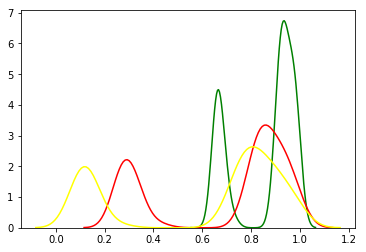

In [150]:
#sns.kdeplot(np.array(JSresults4), color='blue')
sns.kdeplot(np.array(JSresults), color='green')
sns.kdeplot(np.array(JSresults6), color='red')
sns.kdeplot(np.array(JSresults7), color='yellow');